### $\color{royalblue}{\text{Четврта вјежба из нумеричких метода у астрономији, датум: 25.12.2025.}} $

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from Splajn_interpolacija import spline_interp 
import random

#### $\color{magenta}{\text{СПЛАЈН интерполација.}}$

In [2]:
t, x, y, z = np.loadtxt('Saturn.dat', skiprows=2, delimiter=',', unpack=True)

t = t[0::10] 
x = x[0::10]
y = y[0::10]
z = z[0::10]

r = np.sqrt(x**2+y**2+z**2)

[9.95411371]


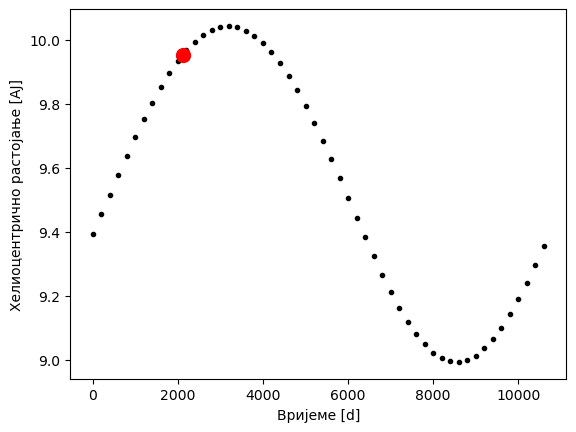

In [3]:
t0 = 2120
r0 = spline_interp(t, r, [t0])
print(r0)

plt.plot(t, r, '.', color='black') 
plt.plot(t0, r0, 'o', color='red', markersize=10)
plt.xlabel('Вријеме [d]')
plt.ylabel('Хелиоцентрично растојање [AJ]')
plt.show()

Поређење Сплајна и Лагранжовог интерполационог полинома.

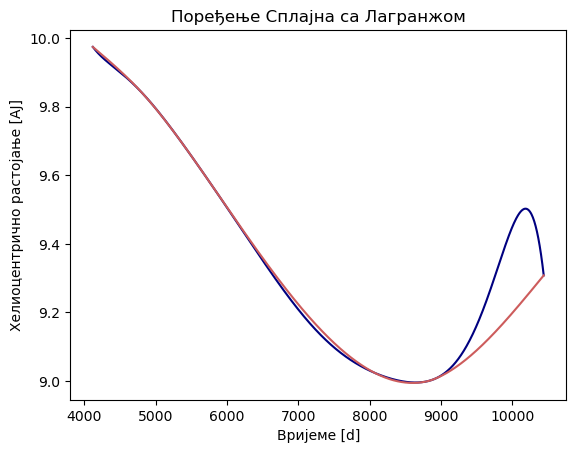

In [5]:
%run Interpolacioni_polinomi.ipynb 

t,x,y,z = np.loadtxt('Saturn.dat', skiprows=2, delimiter=',', unpack=True)

broj_covorova = 10
izbor_cvorova = random.sample(range(200, len(t)), broj_covorova)
izbor_cvorova.sort()
t=t[izbor_cvorova]
x=x[izbor_cvorova]
y=y[izbor_cvorova]
z=z[izbor_cvorova]

r=np.sqrt(x**2+y**2+z**2)

red=len(r)-1

tt=np.linspace(t[0],t[-1],1000)

r_lagranz=lagranz(t,r,tt)
plt.plot(tt,r_lagranz, color='navy', label='Lagranž')
#plt.plot(t,r,'ok')

plt.xlabel('Вријеме [d]')
plt.ylabel('Хелиоцентрично растојање [AJ]')

r_splajn=spline_interp(t,r,tt)

plt.plot(tt,r_splajn, color='indianred', label='Splajn')

plt.title('Поређење Сплајна са Лагранжом')
plt.show()

Дводимензионална интерполација сплајном: хоћемо да одредимо надморску висину произвољног меридијана на Марсу са неким кораком по латитуди.

(720, 1440)
(720, 1440) (720, 1440)


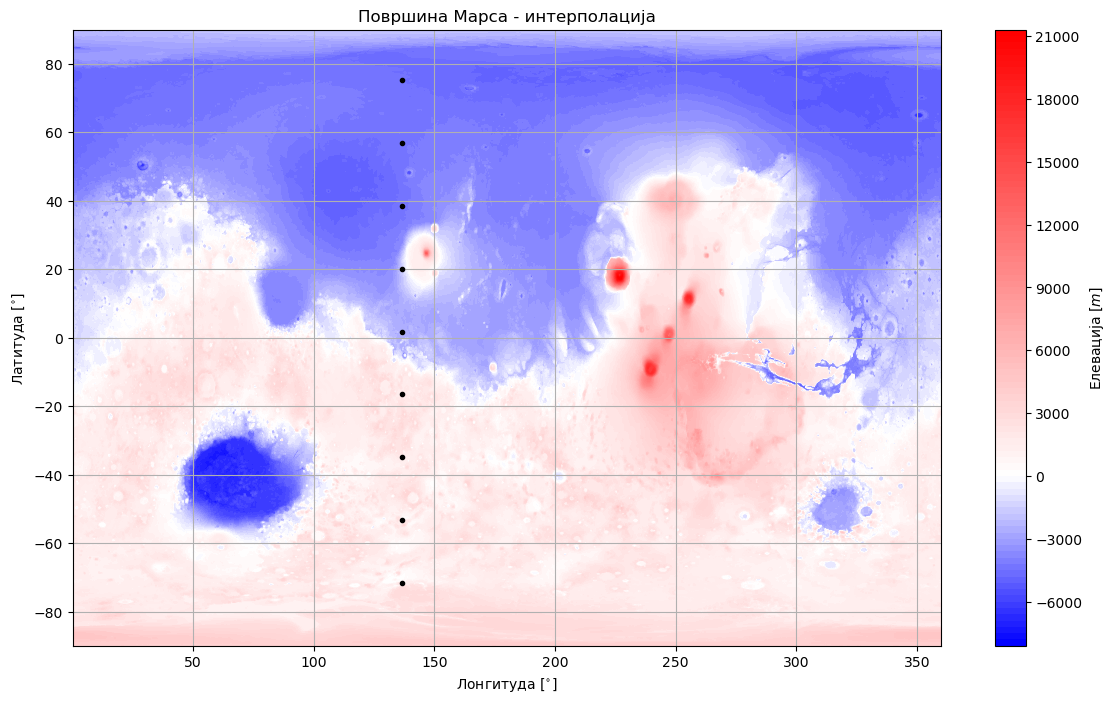

In [ ]:
import matplotlib.colors as mcolors
norm = mcolors.TwoSlopeNorm(vmin=h.min(), vcenter=0, vmax=h.max()) 

korak = 18.36 # корак по латитуди
longituda0 = 136.59 # лонгитуда на којој се траже надморске висине

latituda0 = np.arange(-90 + korak, 90, step = korak) # латитуда на којој се траже надморске висине
# longituda0=np.ones(len(latituda0))*longituda0 

h = np.loadtxt('topografija.dat', skiprows=2)
print(h.shape)

longituda = np.arange(0.125, 360, step = 0.25)
latituda = np.arange(-89.875, 90, step = 0.25)
longituda, latituda=np.meshgrid(longituda, latituda)

print(longituda.shape, latituda.shape)

# резон: h[i, j] представља надморску висину на координатама (longituda[i, j], latituda[i, j])

fig = plt.figure(figsize=(14, 8))
plt.contourf(longituda, latituda, h, 100, cmap='bwr', norm=norm)
plt.xlabel(r'Лонгитуда [$^{\circ}$]')
plt.ylabel(r'Латитуда [$^{\circ}$]')
plt.grid()
cbar = plt.colorbar()
cbar.set_label('Елевација $[m]$')
plt.plot(np.ones(len(latituda0))*longituda0, latituda0, '.k')
plt.title('Површина Марса - интерполација')
plt.show()

Интерполација сплајном по произвољној лонгитуди.

/tmp/ipykernel_148547/771385407.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  h_interp[i] = spline_interp(x, hh, [longituda0])


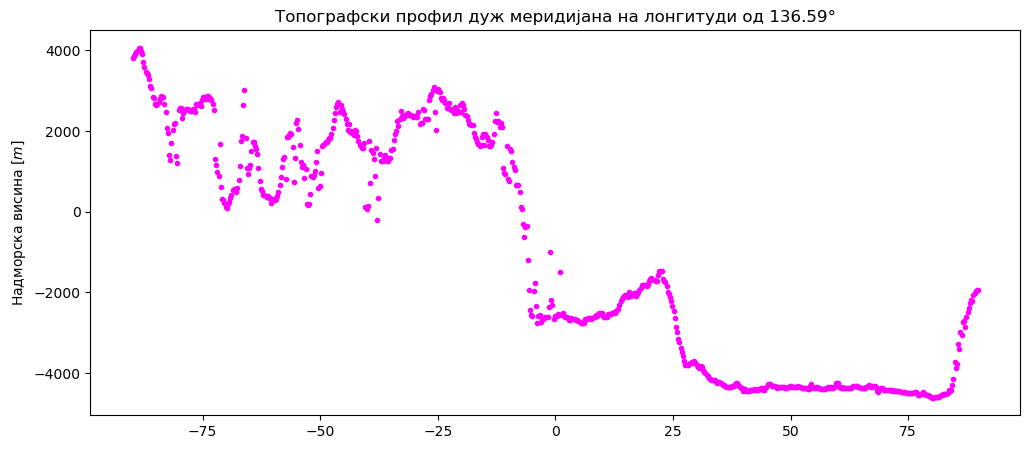

In [15]:
plt.figure(figsize=(12, 5))
x = np.arange(0.125, 360, step = 0.25) # лонгитуда
y = np.arange(-89.875, 90, step = 0.25) # латитуда

h_interp = np.zeros(len(y))
for i in range(len(y)):
    hh = h[i]
    h_interp[i] = spline_interp(x, hh, [longituda0])
    
plt.plot(y, h_interp, '.', color='magenta')
plt.ylabel(r'Латитуда [$^{\circ}$]')
plt.ylabel(r'Надморска висина [$m$]')
plt.title(f'Топографски профил дуж меридијана на лонгитуди од {longituda0}°')
plt.show()

"Додатна" интерполација за спефицичне латитуде. 

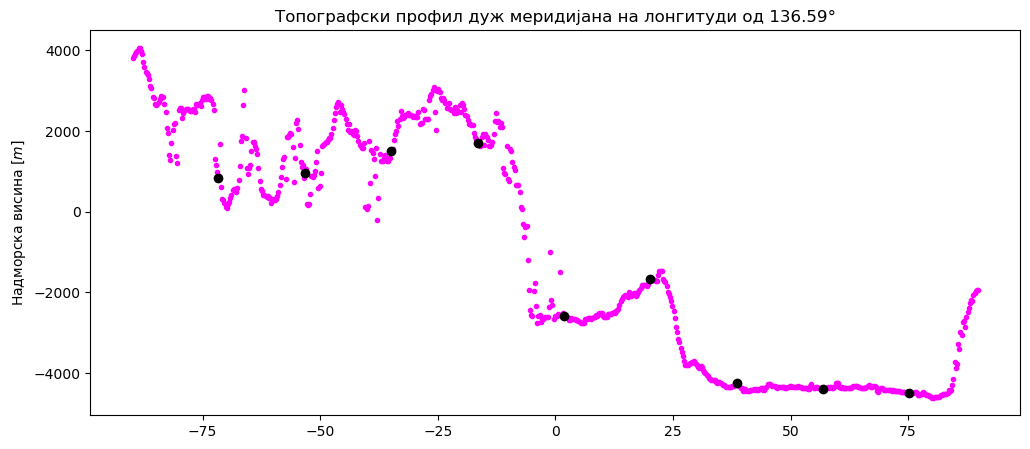

In [17]:
plt.figure(figsize=(12, 5))
h0 = spline_interp(y, h_interp, latituda0)
# print(h0)

plt.plot(y, h_interp, '.', color='magenta')
plt.plot(latituda0, h0, 'o', color='black')

plt.ylabel(r'Латитуда [$^{\circ}$]')
plt.ylabel(r'Надморска висина [$m$]')
plt.title(f'Топографски профил дуж меридијана на лонгитуди од {longituda0}°')
plt.show()

### $\color{green}{\text{ЗАДАЦИ:}} $

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />

1. Биће додато кад прођемо вјежбу уживо. Ипак је тако више фер.

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />